# E_1.08 Physics: Exercise 1 - LDR Curve Profiling

- University: Rhein-Waal University of Applied Sciences (Hochschule Rhein-Waal)
- Course:  E_1.08 Physics: Mechanics, Electricity and Magentism, WS2022/23

## Overview
---

The following lab exercise aims to profile the characteristic curve of an LDR with respect to the illuminance.

## Background preparation before starting the lab
---

The following steps should have been done before startung the exercise:

- [Install Anaconda](https://docs.anaconda.com/anaconda/install/index.html)
- [Create the EEng Conda Environment](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html)
- [Download Notebooks from Git Repo](https://github.com/rolfbecker/EE_1.08_2_EEng_LAB_WS2022)

## Safety Considerations
---

- **DO NOT** energize **ANY** circuit without prior review by the lab assistants, thay will make sure that the circuit is correctly connected, and if not, the will point out the necessary corrections.
- **DO NOT** drop or hit **ANY** components, especially measuring instruments such as the multimeter, Luxmeter, etc.
- For this specific exercise (*LDR Curve Profiling*), **DO NOT TOUCH** the bulb **during or after** use as it may be hot!!.

<center>
    <img src="./images/safety-bulb.png" width="400px"/>
    <br>
    <i></i>
</center>

## List of Equipment
---

**Make sure you have all the components and instruments listed below before you start**.

Components:
- x1 Breadboard
- x1 LDR
- x1 10K Ohm Resistor
- x1 Arduino UNO with cable
- Set of jumper cables
- x1 light bulb
- x1 Ceramic socket with dimmer attached
- Stand/Holder

Instruments:
- x1 Multimeter
- x1 Luxmeter

## Circuit
---

The diagrams below show the test circuit you must make for this exercise. In this diagram there are three connections:
- Vcc 5V (from Arduino UNO)
- GND (from Arduino UNO)
- Analog Pin A5 (this connection is optional)

<div style="display: flex;">
  <div style="float: left; width: 33.33%; padding: 5px;">
      <center>
        <img src="./images/LDR-schem.png" width="400px"/>
        <br>
        <i>LDR test circuit. Schematic representation</i>
      </center>
  </div>
  <div style="float: left; width: 33.33%; padding: 5px;">
      <center>
    <img src="./images/LDR-bb.png" width="400px"/>
    <br>
    <i>LDR test circuit. Breadboard representation</i>
      </center>
  </div>
</div>

## Setup
---

The recommended placement of the components and measuring instruments is shown in the following image:

<center>
    <img src="./images/LDR-setup.png" width="600px"/>
    <br>
    <i></i>
</center>

## Placement
---

1. Position the stand with the light bulb at a height of approximately 70 cm with respect to the base.

<center>
    <img src="./images/stand.png"/>
    <br>
    <i></i>
</center>

2. Place the LDR and the photoreceptor on the base, making sure that they receive the same amount of light.

> Note: Keep the area free of shadows and the lighting in the room consistent. For this experiment it is recommended to position the base in the direction of the window so that both devices (LDR and Photoreceptor) are uniformly affected by the outside light.

<center>
    <img src="./images/ldr-luxmeter-light.png" width="500px"/>
    <br>
    <i></i>
</center>

3. Add the multimeter test probes to measure the voltage across the **10K** resistor.

<center>
    <img src="./images/measurement-points.jpg" width="500px"/>
    <br>
    <i></i>
</center>

## Data Capture
---

The data capture is performed **manually by yourself**. The data must be entered in a text file with extension `.txt.` inside the `data` folder, please follow the format of the `test.txt` file inside the `data` folder.

An example of how the file should be formatted:
```
Ev,DV1
101,1.466
256,2.24
470,2.74
```

The first column of data corresponds to the **Illuminance** $E_v$ measured in **Lux**, and the second column is the **voltage across the 10K resistor**.

**Use the following file:** [myOwnData.txt](./data/myOwnData.txt)

> Note: Keep the area free of shadows and the lighting in the room consistent. For this experiment it is recommended to position the case in the direction of the window so that both devices (LDR and Photodetector) are uniformly affected by the outside light.

**BEFORE** starting the measurements make sure that the light intensity is at **MINIMUM value**. This can be done by using the dimmer attached to the socket cable.

<center>
    <img src="./images/dimmer.jpg" width="400px"/>
    <br>
    <i>Dimmer: Is used to adjust the intensity of light emitted by the light bulb.</i>
</center>

___

Taking into account all of the above considerations, proceed to the following **Measurement procedures:**
1. Take the value displayed by the Luxmeter and the voltage across resistance and add it to the `.txt` file. Example:

<code style="margin: 10px 30px; display: block; color: grey; padding: 1em 2em ;">Ev,DV1
101,1.466
</code>

2. (without changing anything in the setup) **INCREASE** the light intensity and add the new values to the `.txt` file.

<code style="margin: 10px 30px; display: block; color: grey; padding: 1em 2em ;">Ev,DV1
101,1.466
256,2.24
</code>

3. Repeat the above steps until you reach the **MAXIMUM INTENSITY** of the light bulb.

4. When the maximum intensity allowed by the bulb is reached, **decrease** it to the **MINIMUM INTENSITY** and **move the bulb closer to the base** until the amount of **lux is close to the last measurement**. Example:

<center>
    <img src="./images/stand-2.png"/>
    <br>
    <i>The number shown in this image is for <b>REFERENCE ONLY</b> and each team should adjust the height to their needs.</i>
</center>

5. With the height of the bulb adjusted; proceed with steps 1 and 2 until reaches maximum intensity (step 3).

> Note: Due to the heat emitted by the light bulb, **DO NOT place it closer than 20 cm from the base**.

## Data Display

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive

**LDR Model**:

The following simple power function is used to approximate the behaviour of a LDR.

In [2]:
def LDRmodel(lux, m=-0.57, b=2.71e4):
    return b*lux**m

**Fill requested information**:

In [3]:
############################
# Fill these variables with
# the requested information
############################

FILE_NAME = "myOwnData.txt"  # your file name WITH extension

V0 = 5.04 # Output voltage produced by the Arduino UNO

In [4]:
############################
# You do NOT need to change 
# anything in the section below
############################

FILE_PATH = f"./data/{FILE_NAME}"

R1 = 10e3 # Resistor value (10K in this case)

df = pd.read_csv(FILE_PATH)
df.set_index("Ev", inplace = True)
df.head()

,DV1
Ev,
170,2.42
270,2.77
370,3.04
470,3.23
570,3.38


Text(0, 0.5, 'Voltage ($V$)')

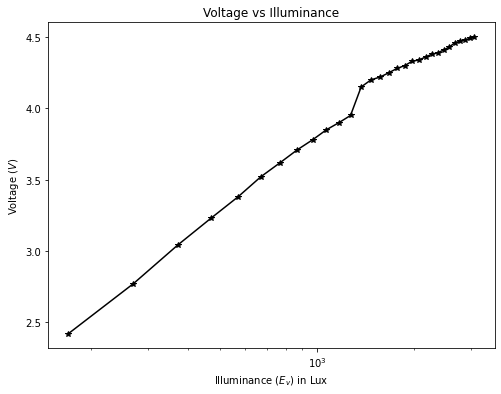

In [5]:
DV1 = df["DV1"]
lux = df.index

fig = DV1.plot(style="-*", color="k", logx=True, figsize=(8,6))
fig.set_title("Voltage vs Illuminance")
fig.set_xlabel("Illuminance ($E_v$) in Lux")
fig.set_ylabel("Voltage ($V$)")

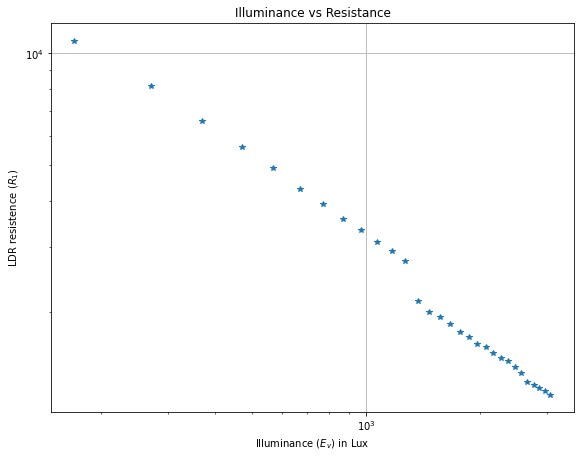

In [6]:
DV2 = V0-DV1
LDR = DV2/DV1*R1

fig2,ax2 = plt.subplots(figsize=(8,6))
fig2.tight_layout()
ax2.set_title("Illuminance vs Resistance")
ax2.set_xlabel("Illuminance ($E_v$) in Lux")
ax2.set_ylabel("LDR resistence ($R_1$)")

#LDR.plot(style="-*", color="k", logx=True, logy=True, ax = ax2)

ax2.loglog(lux, LDR, "*")
ax2.grid(True)

In [7]:
def plotter1(m=-0.67, b=520.e3): # parameters with initial values
     
    V0 = 5.04
    R1 = 9.91e3
    
    DV2 = V0-DV1
    LDR = DV2/DV1*R1

    fig2,ax2 = plt.subplots(figsize=(8,8))
    
    ax2.set_xlim(1e1,1e5)

    ax2.set_ylim(1e2,1e5)

    ax2.loglog(lux, LDR, "*")
    ax2.loglog(lux, LDRmodel(lux,m,b), "-")
    ax2.set_title("Illuminance vs Resistence log-log-plot")
    ax2.set_xlabel("Illuminance ($E_v$) in lux")
    ax2.set_ylabel("LDR resistance ($R$)")
    
    ax2.grid(True)

In [8]:
# initialize the interactive plot
iplot1 = interactive(
    plotter1, 
#    V0=(0.,10.,0.1),
#    R1=(5000.,15000.,100.),
    m=(-0.8,-0.2,0.01),
    b=(100000., 1000000., 10000.)
)

# start the interactive plot
iplot1

interactive(children=(FloatSlider(value=-0.67, description='m', max=-0.2, min=-0.8, step=0.01), FloatSlider(va…

## Questions

**Question 1:**<br>
Describe the difference between the different photosensitive effects of a photoresistor and a photodiode.

**Answer 1:** <br>
The photoresistor senses the light intensity by the resistance dropping (conductance increases) as light intensity increases<br>
But with a photodiode the light intensity is sensed by a voltage gain when the light intensity increases. 

---
**Question 2:**<br>
Describe the difference between a photoresistor and a photodiode?

**Answer 2:**<br>
Photodiode works using a pn junction; as photons are incident the electrons are able to cross the bandwidth from the N doped region to the P doped region creating a voltage source.<br>
LDRs use materials whose conductance is enhanced with the increase of light incident on it.

---
**Question 3:**<br>
Based on your measurements, what are the **slope (m)** and **y-intercept (b)** values that best fit your data?

**Answer 3:**<br>
$m = -0.76$<br>
$b = 570000$

---
**Question 4:**<br>
What would happen if you **repeat the experiment**, but this time you **only change the photoresistor** for one of the same brand?

**Answer 4:**<br>
The <b>slope (m)</b> and the <b>y-intercept (b)</b> would differ slightly.

---
**Question 5:**<br>
Will your current slope and y-intercept values be able to **fit to the new data**?

**Answer 5:**<br>
No

---
**Question 6:**<br>
What would be a better way to represent **resistance-vs-lux curves** ?

**Answer 6:**<br>
We can use multiple photoresistors of the same brand to make an area between the highest curve and the lowest curve,<br>this would be much better to show the range of curves representing <b>resistance-vs-lux curves</b>